In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import RobustScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

In [ ]:
stock = pd.read_csv("Input_Final.csv")
test = pd.read_csv("test.csv")
final = pd.read_csv("sample_submission.csv")
mean_open = test['Open'].mean()
test['Open'].fillna(value = mean_open, inplace = True)
mean_low = test['Low'].mean()
test['Low'].fillna(value = mean_low, inplace = True)

In [ ]:
meanopen = stock["Open"].mean()
medianopen = stock["Open"].median()
modeopen = stock["Open"].mode().iloc[0]

print("Mean:", meanopen)
print("Median:", medianopen)
print("Mode:", modeopen)

Mean: 82.20061249999999
Median: 82.08500000000001
Mode: 80.03


In [ ]:
meanhigh = stock["High"].mean()
medianhigh = stock["High"].median()
modehigh = stock["High"].mode().iloc[0]

print("Mean:", meanhigh)
print("Median:", medianhigh)
print("Mode:", modehigh)

Mean: 82.6814
Median: 82.655
Mode: 80.58


In [ ]:
meanlow = stock["Low"].mean()
medianlow = stock["Low"].median()
modelow = stock["Low"].mode().iloc[0]

print("Mean:", meanlow)
print("Median:", medianlow)
print("Mode:", modelow)

Mean: 81.72534999999999
Median: 81.66499999999999
Mode: 80.02


In [ ]:
meanclose = stock["Close"].mean()
medianclose = stock["Close"].median()
modeclose = stock["Close"].mode().iloc[0]

print("Mean:", meanclose)
print("Median:", medianclose)
print("Mode:", modeclose)

Mean: 82.21860000000001
Median: 82.215
Mode: 79.93


In [ ]:
meanvolume = stock["Volume"].mean()
medianvolume = stock["Volume"].median()
modevolume = stock["Volume"].mode().iloc[0]

print("Mean:", meanvolume)
print("Median:", medianvolume)
print("Mode:", modevolume)

Mean: 9637125.15375
Median: 8075847.5
Mode: 2390080


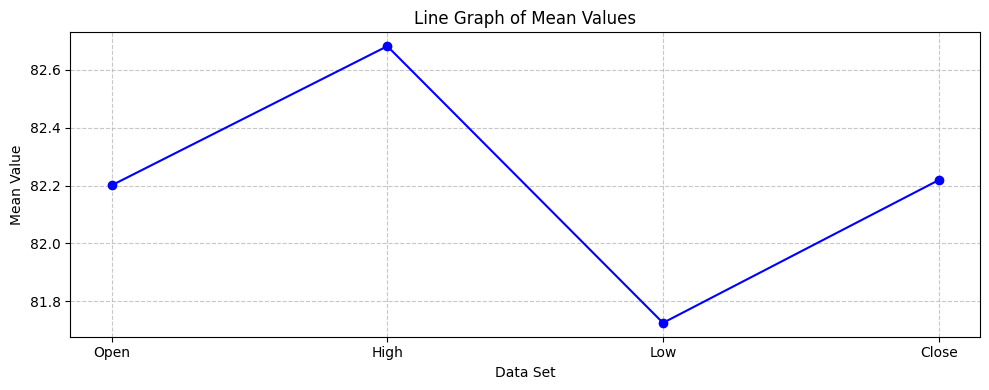

In [ ]:
means = [meanopen,meanhigh,meanlow,meanclose]

plt.figure(figsize=(10,4))
plt.plot(range(len(means)), means, marker='o', linestyle='-', color='b')
plt.xticks(range(len(means)), ['Open','High','Low','Close'])
plt.xlabel('Data Set')
plt.ylabel('Mean Value')
plt.title('Line Graph of Mean Values')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

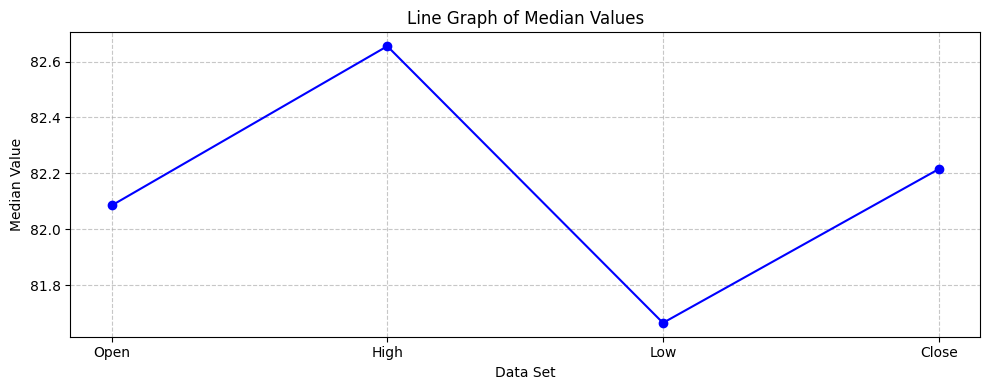

In [ ]:
medians = [medianopen,medianhigh,medianlow,medianclose]

plt.figure(figsize=(10,4))
plt.plot(range(len(medians)), medians, marker='o', linestyle='-', color='b')
plt.xticks(range(len(medians)), ['Open','High','Low','Close'])
plt.xlabel('Data Set')
plt.ylabel('Median Value')
plt.title('Line Graph of Median Values')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

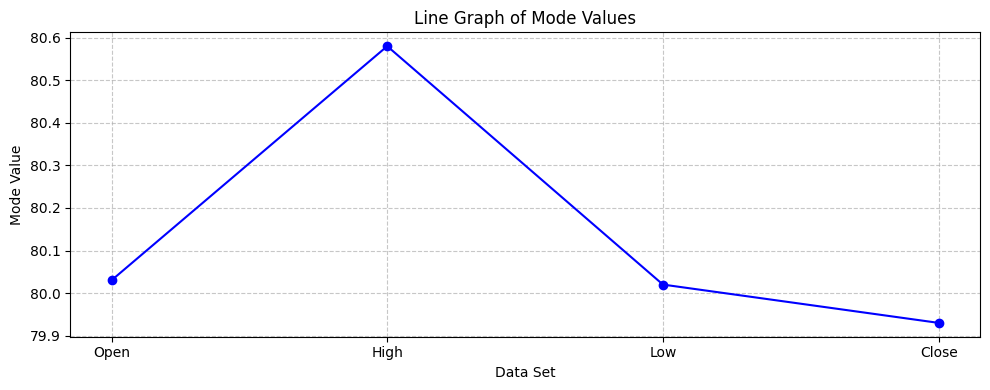

In [ ]:
modes = [modeopen,modehigh,modelow,modeclose]

plt.figure(figsize=(10, 4))
plt.plot(range(len(modes)), modes, marker='o', linestyle='-', color='b')
plt.xticks(range(len(modes)), ['Open','High','Low','Close'])
plt.xlabel('Data Set')
plt.ylabel('Mode Value')
plt.title('Line Graph of Mode Values')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

<Figure size 1200x600 with 0 Axes>

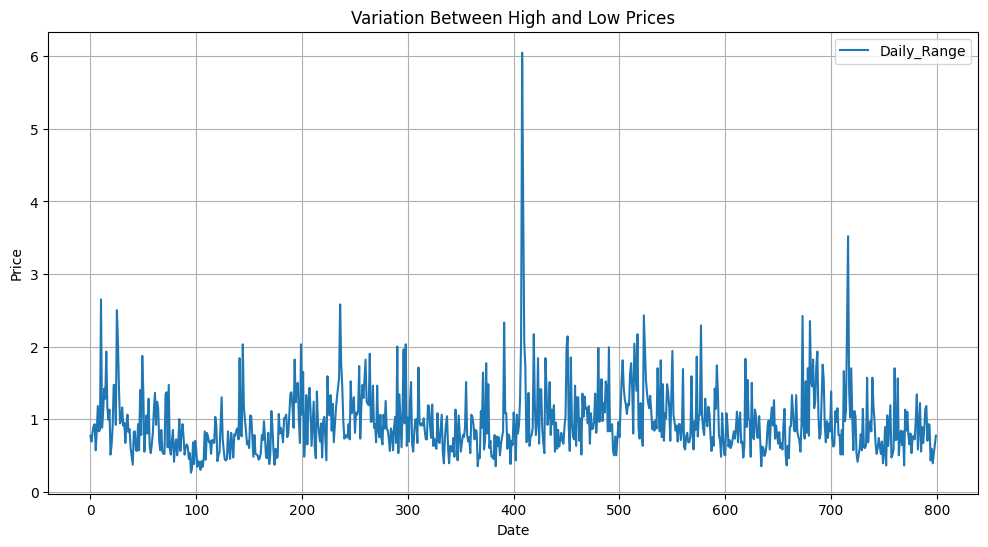

In [ ]:

stock['Daily_Range'] = stock['High'] - stock['Low']
test['Daily Range'] = test['High'] - test['Low']
plot_cols = ['Daily_Range']

plt.figure(figsize=(12, 6))
stock[plot_cols].plot(kind='line', figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Price')

if len(plot_cols) == 2:
    plt.lines[0].set_label('High')
    plt.lines[1].set_label('Low')

plt.title('Variation Between High and Low Prices')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
stock.head()

,Id,Date,Open,High,Low,Close,Volume,Daily_Range
0,1,1/9/2014,80.54,80.80,80.03,80.42,10839420,0.77
1,2,1/10/2014,80.59,80.89,80.20,80.30,8452355,0.69
2,3,1/13/2014,80.01,80.50,79.69,80.01,9366118,0.81
3,4,1/14/2014,80.06,80.92,80.02,80.87,8737186,0.90
4,5,1/15/2014,80.70,81.18,80.25,80.79,8223578,0.93


In [ ]:
stock['Date'] = pd.to_datetime(stock['Date'])
stock.set_index(['Date'],inplace=True)
test['Date'] = pd.to_datetime(test['Date'])
test.set_index(['Date'],inplace=True)

In [ ]:
stock.head()

,Id,Open,High,Low,Close,Volume,Daily_Range
Date,,,,,,,
2014-01-09,1,80.54,80.80,80.03,80.42,10839420,0.77
2014-01-10,2,80.59,80.89,80.20,80.30,8452355,0.69
2014-01-13,3,80.01,80.50,79.69,80.01,9366118,0.81
2014-01-14,4,80.06,80.92,80.02,80.87,8737186,0.90
2014-01-15,5,80.70,81.18,80.25,80.79,8223578,0.93


In [ ]:
stock['Volatility'] = (stock['High'] - stock['Low'])/(stock['Open'])
test['Volatility'] = (test['High'] - test['Low'])/test['Open']

In [ ]:
stock.head()

,Id,Open,High,Low,Close,Volume,Daily_Range,Volatility
Date,,,,,,,,
2014-01-09,1,80.54,80.80,80.03,80.42,10839420,0.77,0.009560
2014-01-10,2,80.59,80.89,80.20,80.30,8452355,0.69,0.008562
2014-01-13,3,80.01,80.50,79.69,80.01,9366118,0.81,0.010124
2014-01-14,4,80.06,80.92,80.02,80.87,8737186,0.90,0.011242
2014-01-15,5,80.70,81.18,80.25,80.79,8223578,0.93,0.011524


In [ ]:
stock['Volatility'] = stock['Volatility'].shift(1)
test['Volatility'] = test['Volatility'].shift(1)

In [ ]:
stock.head()

,Id,Open,High,Low,Close,Volume,Daily_Range,Volatility
Date,,,,,,,,
2014-01-09,1,80.54,80.80,80.03,80.42,10839420,0.77,NaN
2014-01-10,2,80.59,80.89,80.20,80.30,8452355,0.69,0.009560
2014-01-13,3,80.01,80.50,79.69,80.01,9366118,0.81,0.008562
2014-01-14,4,80.06,80.92,80.02,80.87,8737186,0.90,0.010124
2014-01-15,5,80.70,81.18,80.25,80.79,8223578,0.93,0.011242


In [ ]:
correlation = stock.corr()
print(correlation)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import itertools
p=q=range (0,8)
d = range(0,2)
pdq = list(itertools.product (p, d, q))

store = {}
for param in pdq:
       try:
              model_arima = sm.tsa.arima.ARIMA (stock.Close, order = param)
              model_arima_fit = model_arima.fit()
              store[param] =  model_arima_fit.aic
              #print(param, model_arima_fit.aic)
       except:
              continue

sorted_dict = dict(sorted(store.items(), key=lambda item: item[1]))
print(sorted_dict)

{(3, 1, 5): 1760.627438630999, (3, 1, 4): 1761.1112264560093, (2, 1, 7): 1763.2064826933834, (2, 1, 3): 1763.6340166749928, (3, 1, 2): 1763.6557244939067, (0, 1, 1): 1763.8348782858789, (1, 1, 0): 1763.8961445821903, (0, 1, 0): 1764.0700633474148, (1, 1, 1): 1764.6778123315012, (5, 1, 0): 1765.161720335463, (4, 1, 0): 1765.165674956197, (0, 1, 5): 1765.28071820405, (0, 1, 2): 1765.6428458189853, (4, 1, 1): 1765.7079737769582, (0, 1, 4): 1765.7449123274132, (3, 1, 3): 1765.7456118653465, (2, 1, 0): 1765.763629272813, (1, 1, 4): 1766.044250745889, (0, 1, 3): 1766.2467643353984, (4, 1, 3): 1766.359116164278, (3, 1, 0): 1766.57160995741, (2, 1, 1): 1766.6488614550262, (1, 1, 2): 1766.6521369375744, (5, 1, 1): 1766.9891704732786, (6, 1, 0): 1767.0040181890372, (1, 1, 5): 1767.2331554317136, (0, 1, 6): 1767.2346232035093, (4, 1, 4): 1767.3733849388668, (1, 1, 3): 1767.6102921511558, (4, 1, 2): 1767.6288046086493, (3, 1, 1): 1767.6595396826506, (2, 1, 4): 1767.8418532465298, (5, 1, 3): 1767.9

In [ ]:
endog = stock['Close']
exog = sm.add_constant(stock[['Open', 'High','Low']])

mod = sm.tsa.statespace.SARIMAX(endog=endog, exog=exog, order=(3,1,5), seasonal_order=(1,0,0,5))
model_fit = mod.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  800
Model:             SARIMAX(3, 1, 5)x(1, 0, [], 5)   Log Likelihood                -130.061
Date:                            Fri, 05 Apr 2024   AIC                            288.121
Time:                                    13:27:44   BIC                            353.688
Sample:                                         0   HQIC                           313.311
                                            - 800                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.316e-09      2e-09     -4.155      0.000   -1.22e-08   -4.39e-09
Open          -0.5491      0.025    -21.751      0.000      -0.599      -0.500
High           0.8030      0.018     44.108      0.000       0.767       0.839
Low            0.7429      0.016     46.710      0.000       0.712       0.774
ar.L1         -0.8605      0.192     -4.488      0.000      -1.236      -0.485
ar.L2         -0.8874      0.162     -5.489      0.000      -1.204      -0.571
ar.L3         -0.4117      0.184     -2.241      0.025      -0.772      -0.052
ma.L1         -0.0649      0.192     -0.339      0.735      -0.441       0.311
ma.L2          0.1327      0.178      0.745      0.456      -0.216       0.482
ma.L3         -0.4575      0.160     -2.858      0.004      -0.771      -0.144
ma.L4         -0.3833      0.177     -2.160      0.031      -0.731      -0.036
ma.L5         -0.1765      0.050     -3.528      0.000      -0.274      -0.078
ar.S.L5        0.1107      0.060      1.832      0.067      -0.008       0.229
sigma2         0.0805      0.003     24.846      0.000       0.074       0.087
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):               165.13
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.14e+24. Standard errors may be unstable.
"""

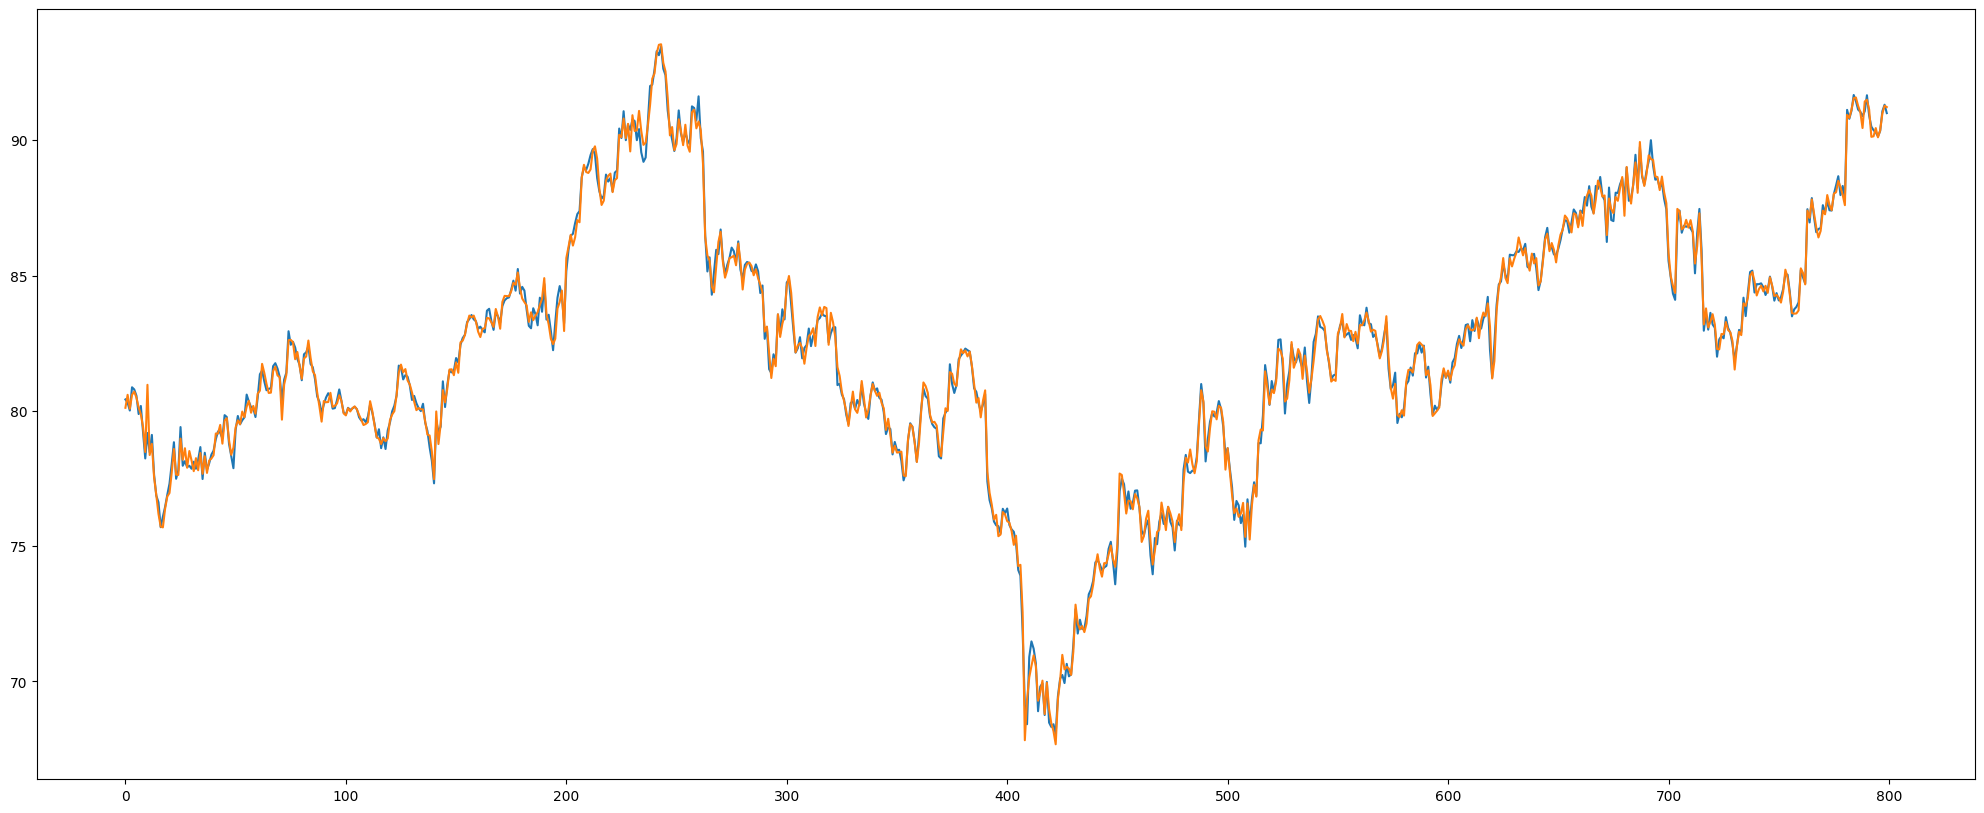

In [ ]:
stock['Close'].plot(figsize=(25,10))
model_fit.fittedvalues.plot()
plt.show()

In [ ]:
predict = model_fit.predict(start = 0,end =len(stock)-1,exog = sm.add_constant(stock[['Open','High','Low']]))
stock['Predicted'] = predict.values
stock.tail(5)

,Id,Open,High,Low,Close,Volume,Daily_Range,Volatility,predicted,Residual,Predicted
Date,,,,,,,,,,,
2017-03-08,796,90.02,90.35,89.76,90.14,5513405,0.59,0.004770,90.105428,0.034572,90.105428
2017-03-09,797,90.14,90.49,90.10,90.34,5587379,0.39,0.006554,90.361869,0.021869,90.361869
2017-03-10,798,90.80,91.16,90.65,91.07,6797792,0.51,0.004327,90.986364,0.083636,90.986364
2017-03-13,799,91.06,91.49,90.85,91.31,7397472,0.64,0.005617,91.272753,0.037247,91.272753
2017-03-14,800,91.26,91.59,90.82,91.00,6686388,0.77,0.007028,91.223456,0.223456,91.223456


In [ ]:
stock['Residual'] = abs(stock['Close']-stock['Predicted'])
MAE = stock['Residual'].sum()/len(stock)
MAPE = (abs(stock['Residual'])/stock['Close']).sum()*100/len(stock)
print("MAE:", MAE)
print("MAPE:", MAPE)

MAE: 0.2210511479088199
MAPE: 0.2709119897857293


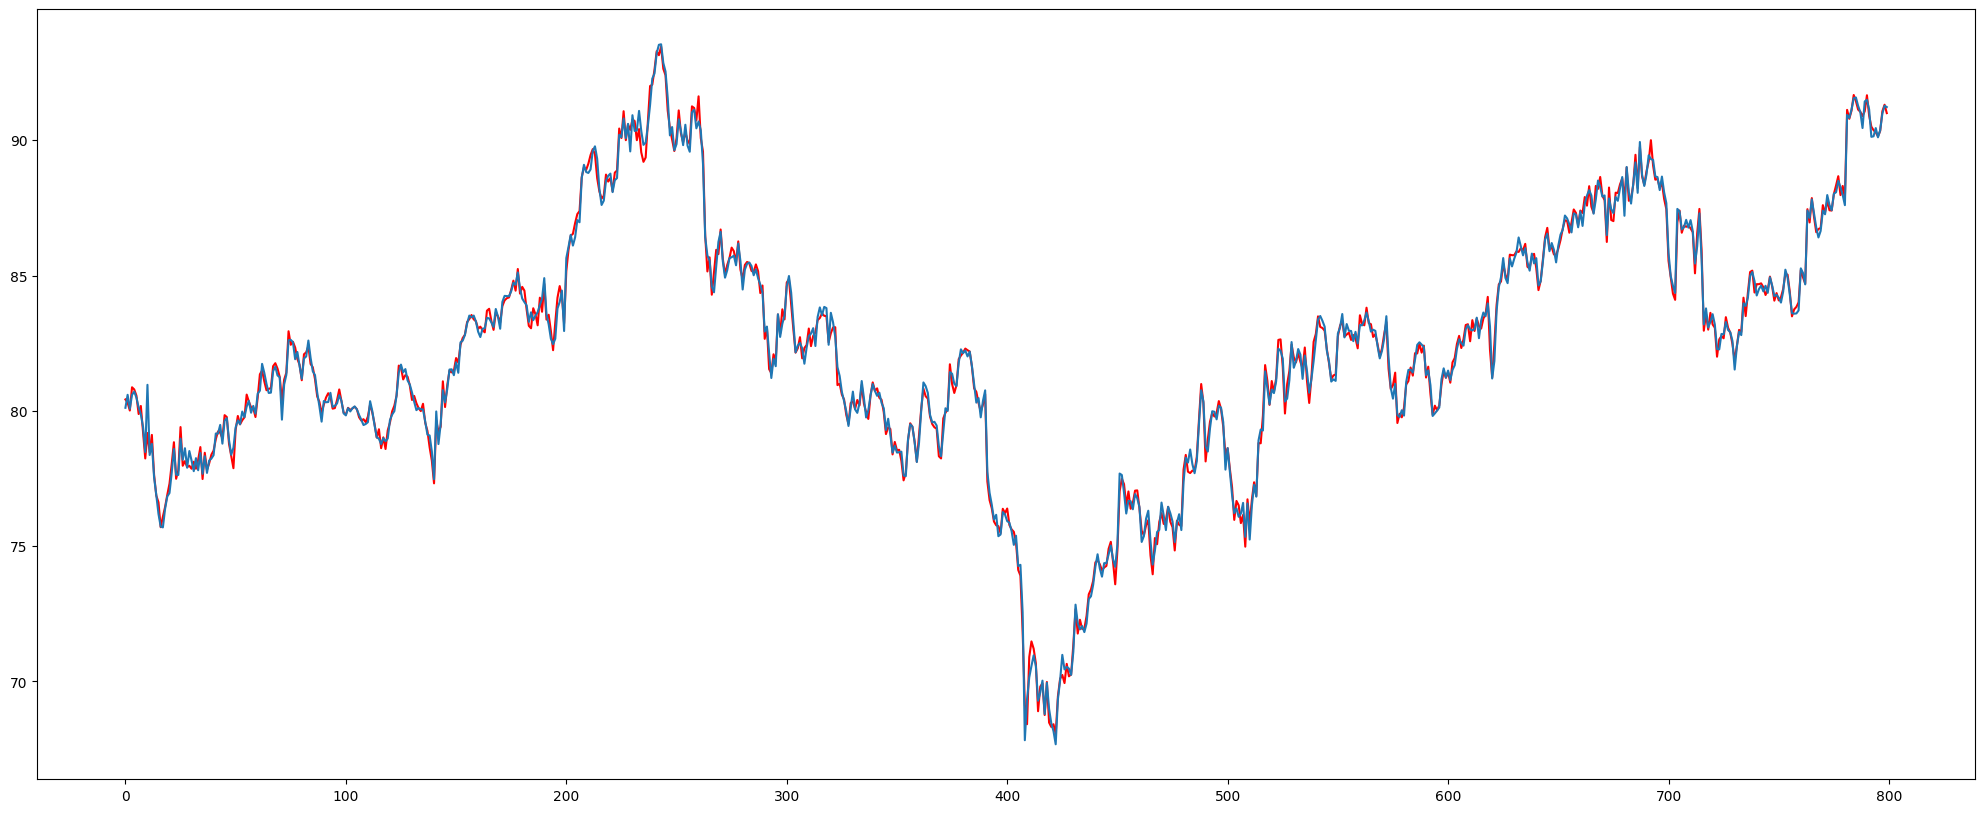

In [ ]:
stock['Close'].plot(figsize=(25,10),color = 'red')
stock['Predicted'].plot()
plt.show()

In [ ]:
predict_final = model_fit.predict(start = len(stock),end =len(stock)+len(test)-1,exog = sm.add_constant(test[['Open','High','Low']]))
test['Predicted'] = predict_final.values
test.tail(5)

,Id,Date,Open,High,Low,Volume,Predicted
195,996,12/20/2017,91.80,91.97,91.53,6938546,91.726091
196,997,12/21/2017,91.66,92.08,91.67,4860406,91.995294
197,998,12/22/2017,91.88,92.43,92.13,4919406,92.497271
198,999,12/26/2017,92.35,92.77,92.48,3431941,92.772231
199,1000,12/27/2017,92.49,92.75,92.10,4276664,92.396995


In [ ]:
final['Close'] = predict_final.values
final.head()

,Id,Close
0,801,91.400456
1,802,91.370591
2,803,91.501813
3,804,91.300469
4,805,91.446973
